<a href="https://colab.research.google.com/github/tanmaysk001/Exoplanet-Prediction-Project-/blob/main/Habitability_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#The Basics
import matplotlib.pyplot as plt
import pandas as pd
import re
import numpy as np

#Machine Learning models
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [ ]:
data = pd.read_csv("https://github.com/ChristopherBacon/Habitable-Exoplanets/blob/main/Filteredexoplanets2.csv?raw=true", sep=',', engine='python')

In [ ]:
data.columns

Index(['pl_name', 'hostname', 'default_flag', 'sy_snum', 'sy_pnum', 'soltype',
       'pl_controv_flag', 'pl_orbper', 'pl_orbsmax', 'pl_radj', 'pl_masse',
       'pl_orbeccen', 'pl_insol', 'pl_eqt', 'ttv_flag', 'st_teff', 'st_rad',
       'st_mass', 'st_met', 'st_metratio', 'st_logg', 'sy_refname', 'rastr',
       'ra', 'decstr', 'dec', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'],
      dtype='object')

In [ ]:
new_headings = {'pl_name': 'Planet Name', 'hostname': 'Host Name', 'default_flag': 'Default Parameter Set',
                'sy_snum': 'Number of Stars', 'sy_pnum': 'Number of Planets', 'soltype': 'Solution Type',
                'pl_controv_flag': 'Controversial Flag', 'pl_orbper': 'Orbital Period [days]',
                'pl_orbsmax': 'Orbit Semi-Major Axis [AU]', 'pl_radj': 'Planet Radius [Jupiter Radius]',
                'pl_masse': 'Planet Mass [Earth Mass]', 'pl_orbeccen': 'Eccentricity',
                'pl_insol': 'Insolation Flux [Earth Flux]', 'pl_eqt': 'Equilibrium Temperature [K]',
                'ttv_flag': 'Data show Transit Timing Variations', 'st_teff': 'Stellar Effective Temperature [K]',
                'st_rad': 'Stellar Radius [Solar Radius]', 'st_mass': 'Stellar Mass [Solar mass]',
                'st_met': 'Stellar Metallicity [dex]', 'st_metratio': 'Stellar Metallicity Ratio',
                'st_logg': 'Stellar Surface Gravity [log10(cm/s**2)]', 'sy_refname': 'System Parameter Reference',
                'rastr': 'RA [sexagesimal]', 'ra': 'RA [decimal]', 'decstr': 'Dec [sexagesimal]',
                'dec': 'Dec [decimal]', 'sy_dist': 'Distance [pc]', 'sy_vmag': 'V (Johnson) Magnitude',
                'sy_kmag': 'Ks (2MASS) Magnitude', 'sy_gaiamag': 'Gaia Magnitude'}

#Now rename the column headings
data2 = data.rename(columns=new_headings, errors='ignore')

In [ ]:
data2

,Planet Name,Host Name,Default Parameter Set,Number of Stars,Number of Planets,Solution Type,Controversial Flag,Orbital Period [days],Orbit Semi-Major Axis [AU],Planet Radius [Jupiter Radius],Planet Mass [Earth Mass],Eccentricity,Insolation Flux [Earth Flux],Equilibrium Temperature [K],Data show Transit Timing Variations,Stellar Effective Temperature [K],Stellar Radius [Solar Radius],Stellar Mass [Solar mass],Stellar Metallicity [dex],Stellar Metallicity Ratio,Stellar Surface Gravity [log10(cm/s**2)],System Parameter Reference,RA [sexagesimal],RA [decimal],Dec [sexagesimal],Dec [decimal],Distance [pc],V (Johnson) Magnitude,Ks (2MASS) Magnitude,Gaia Magnitude
0,11 Com b,11 Com,1,2,1,CONFIRMED,0,326.03000,1.29000,NaN,NaN,0.2310,NaN,NaN,0,4742.0,19.00,2.70,-0.350,[Fe/H],2.31,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038
1,11 Com b,11 Com,0,2,1,CONFIRMED,0,NaN,1.21000,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,2.60,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038
2,11 UMi b,11 UMi,1,1,1,CONFIRMED,0,516.21997,1.53000,NaN,NaN,0.0800,NaN,NaN,0,4213.0,29.79,2.78,-0.020,[Fe/H],1.93,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216
3,11 UMi b,11 UMi,0,1,1,CONFIRMED,0,NaN,1.51000,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,1.70,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216
4,11 UMi b,11 UMi,0,1,1,CONFIRMED,0,516.22000,1.54000,NaN,NaN,0.0800,NaN,NaN,0,4340.0,24.08,1.80,0.040,[Fe/H],1.60,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26225,ups And d,ups And,0,2,3,CONFIRMED,0,1274.60000,2.51000,NaN,NaN,0.2420,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,4.09565,2.859,3.98687
26226,ups And d,ups And,1,2,3,CONFIRMED,0,1276.46000,2.51329,NaN,NaN,0.2987,NaN,NaN,0,NaN,1.56,1.30,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,4.09565,2.859,3.98687
26227,ups And d,ups And,0,2,3,CONFIRMED,0,1319.00000,2.57000,NaN,NaN,0.2690,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,01h36m47.60s,24.198353,+41d24m13.73s,41.403815,13.4054,4.09565,2.859,3.98687
26228,xi Aql b,xi Aql,1,1,1,CONFIRMED,0,136.75000,0.68000,NaN,NaN,0.0000,NaN,NaN,0,4780.0,12.00,2.20,-0.205,[Fe/H],2.66,<a refstr=STASSUN_ET_AL__2018 href=https://ui....,19h54m14.99s,298.562449,+08d27m39.98s,8.461105,56.1858,4.70964,2.171,4.42501


In [ ]:
#Value counts for the enrties, looks like we can drop this column
data2['Solution Type'].value_counts()

CONFIRMED                        14064
CANDIDATE_KOI_q1_q16_koi          2298
CANDIDATE_KOI_q1_q17_dr25_koi     2291
CANDIDATE_KOI_q1_q17_dr24_koi     2281
CANDIDATE_KOI_q1_q12_koi          2263
CANDIDATE_KOI_q1_q8_koi           1992
CANDIDATE_K2                      1004
CANDIDATE_TOI                       37
Name: Solution Type, dtype: int64

In [ ]:
#Check value counts in any quesitonable columns and remove
data2 = data2.drop(['Solution Type', 'System Parameter Reference'],axis=1)

In [ ]:
#Check to see how many entries are controversial data
data2['Controversial Flag'].value_counts()

0    26194
1       36
Name: Controversial Flag, dtype: int64

In [ ]:
#Select only the data with no controversial flags
data2 = data2.loc[data2['Controversial Flag'] == False,]

#We can now drop the controversial column
data2 = data2.drop('Controversial Flag', axis=1)

In [ ]:
data2.columns

Index(['Planet Name', 'Host Name', 'Default Parameter Set', 'Number of Stars',
       'Number of Planets', 'Orbital Period [days]',
       'Orbit Semi-Major Axis [AU]', 'Planet Radius [Jupiter Radius]',
       'Planet Mass [Earth Mass]', 'Eccentricity',
       'Insolation Flux [Earth Flux]', 'Equilibrium Temperature [K]',
       'Data show Transit Timing Variations',
       'Stellar Effective Temperature [K]', 'Stellar Radius [Solar Radius]',
       'Stellar Mass [Solar mass]', 'Stellar Metallicity [dex]',
       'Stellar Metallicity Ratio', 'Stellar Surface Gravity [log10(cm/s**2)]',
       'RA [sexagesimal]', 'RA [decimal]', 'Dec [sexagesimal]',
       'Dec [decimal]', 'Distance [pc]', 'V (Johnson) Magnitude',
       'Ks (2MASS) Magnitude', 'Gaia Magnitude'],
      dtype='object')

In [ ]:
#As we can see there are a number of planets without estimated masses.
#Lets fill the NaN values with the median as there are some large outliers
data2['Planet Mass [Earth Mass]'].value_counts(dropna=False)

NaN         23882
21.000         19
181.000        11
180.000        11
270.000        10
            ...  
3210.000        1
143.653         1
11.820          1
607.000         1
381.100         1
Name: Planet Mass [Earth Mass], Length: 1487, dtype: int64

In [ ]:
#We can see here that our median mass & radius for planets is:
print(data2['Planet Mass [Earth Mass]'].median())
print(data2['Planet Radius [Jupiter Radius]'].median())

212.3095
0.217


In [ ]:
#Let's now fill the mass & radius of the planet with the median mass & radius
data3 = data2.fillna(data2.median())

In [ ]:
data3['Stellar Metallicity Ratio'].value_counts()

[Fe/H]    14337
[M/H]      2531
[m/H]        34
[Me/H]        4
Name: Stellar Metallicity Ratio, dtype: int64

In [ ]:
#This is more tricky because we want to maintain the ratio of these values,
#and this does not allow us a median value.
data3['Stellar Metallicity Ratio'].value_counts(normalize=True)

[Fe/H]    0.848042
[M/H]     0.149710
[m/H]     0.002011
[Me/H]    0.000237
Name: Stellar Metallicity Ratio, dtype: float64

In [ ]:
#Now we can fill columns based on the normalised values
nans = data3['Stellar Metallicity Ratio'].isna()
length = sum(nans)
#replace with random probabilities to maintain current ratio
replacement = np.random.choice(['[Fe/H]', '[M/H]','[m/H]', '[Me/H]'], length,
                               p=[.848042, .149710,.002011,.000237])

data3.loc[nans,'Stellar Metallicity Ratio'] = replacement
data4 = data3

In [ ]:
data4.head(14)

,Planet Name,Host Name,Default Parameter Set,Number of Stars,Number of Planets,Orbital Period [days],Orbit Semi-Major Axis [AU],Planet Radius [Jupiter Radius],Planet Mass [Earth Mass],Eccentricity,Insolation Flux [Earth Flux],Equilibrium Temperature [K],Data show Transit Timing Variations,Stellar Effective Temperature [K],Stellar Radius [Solar Radius],Stellar Mass [Solar mass],Stellar Metallicity [dex],Stellar Metallicity Ratio,Stellar Surface Gravity [log10(cm/s**2)],RA [sexagesimal],RA [decimal],Dec [sexagesimal],Dec [decimal],Distance [pc],V (Johnson) Magnitude,Ks (2MASS) Magnitude,Gaia Magnitude
0,11 Com b,11 Com,1,2,1,326.030000,1.290,0.217,212.3095,0.231,81.88,789.0,0,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038
1,11 Com b,11 Com,0,2,1,11.023475,1.210,0.217,212.3095,0.000,81.88,789.0,0,5620.0,0.95,2.60,-0.02,[Fe/H],4.47,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,93.1846,4.72307,2.282,4.44038
2,11 UMi b,11 UMi,1,1,1,516.219970,1.530,0.217,212.3095,0.080,81.88,789.0,0,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216
3,11 UMi b,11 UMi,0,1,1,11.023475,1.510,0.217,212.3095,0.000,81.88,789.0,0,5620.0,0.95,1.70,-0.02,[M/H],4.47,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216
4,11 UMi b,11 UMi,0,1,1,516.220000,1.540,0.217,212.3095,0.080,81.88,789.0,0,4340.0,24.08,1.80,0.04,[Fe/H],1.60,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,125.3210,5.01300,1.939,4.56216
5,14 And b,14 And,0,1,1,11.023475,0.680,0.217,212.3095,0.000,81.88,789.0,0,5620.0,0.95,1.20,-0.02,[Fe/H],4.47,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,5.23133,2.331,4.91781
6,14 And b,14 And,1,1,1,185.840000,0.830,0.217,212.3095,0.000,81.88,789.0,0,4813.0,11.00,2.20,-0.24,[Fe/H],2.63,23h31m17.80s,352.824150,+39d14m09.01s,39.235837,75.4392,5.23133,2.331,4.91781
7,14 Her b,14 Her,0,1,1,1773.400000,2.770,0.217,212.3095,0.369,81.88,789.0,0,5620.0,0.95,0.96,-0.02,[Fe/H],4.47,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,6.61935,4.714,6.38300
8,14 Her b,14 Her,0,1,1,1796.400000,2.800,0.217,212.3095,0.338,81.88,789.0,0,5255.0,0.95,0.90,0.51,[Fe/H],4.40,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,6.61935,4.714,6.38300
9,14 Her b,14 Her,0,1,1,1724.000000,2.820,0.217,212.3095,0.370,81.88,789.0,0,5620.0,0.95,1.00,0.35,[Fe/H],4.47,16h10m24.50s,242.602101,+43d48m58.90s,43.816362,17.9323,6.61935,4.714,6.38300



So we are going to use three criteria to determine the possibility as to whether our planets are habitable or not:

$$0.95 \ \leq x \leq 1.67 \: \text{AU (semi-major axis)}$$$$0.3 \ \leq x \leq 10.0 \: \text{M}_\oplus \: \text{(Planet Mass [Earth Mass])}$$
$$0.78 \ \leq x \leq 1.04 \: \text{M}_\odot \: \text{Stellar Mass [Solar Mass]}$$

For simple life:

$$0.57 \ \leq x \leq 1.64 \: \text{M}_\odot \: \text{Stellar Mass [Solar Mass]}$$

In [ ]:
# Applying conditions to generate habitable column. Using 'np.where'.
data4['habitable'] = np.where((data4['Orbit Semi-Major Axis [AU]'].round(2) >= 0.95) &
                              (data4['Orbit Semi-Major Axis [AU]'].round(2) <= 1.65) &
                              (data4['Planet Mass [Earth Mass]'].round(2) >= 0.30) &
                              (data4['Planet Mass [Earth Mass]'].round(2) <= 10.00) &
                              (data4['Stellar Mass [Solar mass]'].round(2) >= 0.78) &
                              (data4['Stellar Mass [Solar mass]'].round(2) <= 1.04),
                              'Yes',
                              'No'
                             )

In [ ]:
#We are left with one solitary planet
data4['habitable'].value_counts()

No     26193
Yes        1
Name: habitable, dtype: int64

In [ ]:
#The planet is 'Kepler-47 c'
data4[data4['habitable'] == 'Yes']

,Planet Name,Host Name,Default Parameter Set,Number of Stars,Number of Planets,Orbital Period [days],Orbit Semi-Major Axis [AU],Planet Radius [Jupiter Radius],Planet Mass [Earth Mass],Eccentricity,Insolation Flux [Earth Flux],Equilibrium Temperature [K],Data show Transit Timing Variations,Stellar Effective Temperature [K],Stellar Radius [Solar Radius],Stellar Mass [Solar mass],Stellar Metallicity [dex],Stellar Metallicity Ratio,Stellar Surface Gravity [log10(cm/s**2)],RA [sexagesimal],RA [decimal],Dec [sexagesimal],Dec [decimal],Distance [pc],V (Johnson) Magnitude,Ks (2MASS) Magnitude,Gaia Magnitude,habitable
18873,Kepler-47 c,Kepler-47,1,2,4,303.227,0.9638,0.415,3.17,0.044,81.88,789.0,1,5620.0,0.94,0.96,-0.02,[Fe/H],4.47,19h41m11.49s,295.297888,+46d55m13.55s,46.92043,1025.02,15.31,13.535,15.1626,Yes


Text(0, 0.5, 'Planets [num]')

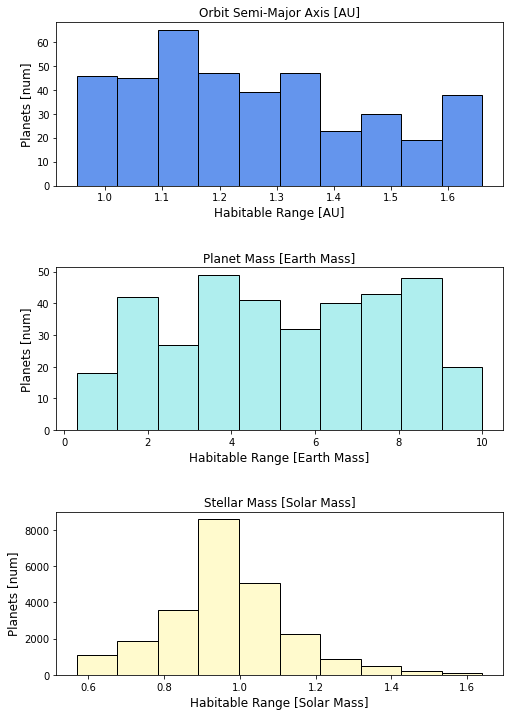

In [ ]:
#Create plots and sizes
fig = plt.figure(figsize=(8,12))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

#Create subplots
ax1 = fig.add_subplot(3, 1, 1)
ax2 = fig.add_subplot(3, 1, 2)
ax3 = fig.add_subplot(3, 1, 3)

#Data and ranges of habitability
ax1.hist(x=data4['Orbit Semi-Major Axis [AU]'],range=[0.95,1.66], color='cornflowerblue', edgecolor='k')
ax2.hist(x=data4['Planet Mass [Earth Mass]'], range=[0.30,10.00], color='paleturquoise', edgecolor='k')
ax3.hist(x=data4['Stellar Mass [Solar mass]'], range=[0.57,1.64], color='lemonchiffon', edgecolor='k')

#Plot annotation
ax1.set_title('Orbit Semi-Major Axis [AU]')
ax1.set_xlabel('Habitable Range [AU]', fontsize=12)
ax1.set_ylabel('Planets [num]', fontsize=12)

ax2.set_title('Planet Mass [Earth Mass]')
ax2.set_xlabel('Habitable Range [Earth Mass]', fontsize=12)
ax2.set_ylabel('Planets [num]', fontsize=12)

ax3.set_title('Stellar Mass [Solar Mass]')
ax3.set_xlabel('Habitable Range [Solar Mass]', fontsize=12)
ax3.set_ylabel('Planets [num]', fontsize=12)


As we can see if we take a look at all three of our habitable ranges there are a significant number of planets that exist within each of the criteria, but from the data only one planet that exists within all three. So, can we broaden out our search in our search for life and habitability on others planets?

Let's go back to our original criteria and try again for simple life:

$$0.57 \ \leq x \leq 1.64 \: \text{M}_\odot \: \text{Stellar Mass [Solar Mass]}$$

In [ ]:
#Check to see if new planets in the expanded parameters
data4['habitable'] = np.where((data4['Orbit Semi-Major Axis [AU]'].round(2) >= 0.95) &
                              (data4['Orbit Semi-Major Axis [AU]'].round(2) <= 1.65) &
                              (data4['Planet Mass [Earth Mass]'].round(2) >= 0.30) &
                              (data4['Planet Mass [Earth Mass]'].round(2) <= 10.00) &
                              (data4['Stellar Mass [Solar mass]'].round(2) >= 0.57) &
                              (data4['Stellar Mass [Solar mass]'].round(2) <= 1.64),
                              'Yes',
                              'No')

In [ ]:
#We are still left with just one solitary planet
data4['habitable'].value_counts()

No     26193
Yes        1
Name: habitable, dtype: int64

In [ ]:
#Select test data, I have removed a lot of the non-float values.
all_X = data4.drop(columns=['habitable','Planet Name','Host Name', 'Stellar Metallicity Ratio', 'RA [sexagesimal]', 'Dec [sexagesimal]' ])
all_y = data4['habitable']

#apply train, test, split
X_train, X_test, y_train, y_test = train_test_split(all_X, all_y, test_size=0.33)

In [ ]:
#Naive Bayes Gaussian Model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

#model prediction
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print("Score:", gnb.score(X_train, y_train))

Number of mislabeled points out of a total 8645 points : 0
Score: 1.0


In [ ]:
#Decision Tree
decision_tree = DecisionTreeClassifier(max_depth=2)
decision_tree.fit(X_train, y_train)

#model prediction
y_pred = decision_tree.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print("Score:", decision_tree.score(X_train, y_train))

Number of mislabeled points out of a total 8645 points : 0
Score: 1.0


In [ ]:
#Support Vector Machine
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

#model prediction
y_pred = decision_tree.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

print("Score:", svclassifier.score(X_train, y_train))

Number of mislabeled points out of a total 8645 points : 0
Score: 0.9999430166961081


In [ ]:
#Models
a = gnb.fit(X_train, y_train)
b = decision_tree.fit(X_train, y_train)
c = svclassifier.fit(X_train, y_train)

ml_models = [a,b,c]

#Model scores, and cross-validation.
for model in ml_models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Scores:", scores, '\n')
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std(), '\n')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Scores: [1.        1.        1.        0.9997151 1.       ] 

Mean: 0.99994301994302
Standard Deviation: 0.00011396011396009875 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Scores: [1.        1.        1.        0.9997151 1.       ] 

Mean: 0.99994301994302
Standard Deviation: 0.00011396011396009875 



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)


Scores: [0.9994302  1.         1.                nan 0.99914506] 

Mean: nan
Standard Deviation: nan 

